<a href="https://colab.research.google.com/github/sonsiho/PythonForEngineer/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import thư viện hổ trợ

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị

import time # module xử lý thời gian
import math # module xử lý các phép toán
import datetime # module xử lý ngày tháng


# Import widgets - thư viện xử lý UI
from ipywidgets import widgets, interactive, interact
import ipywidgets as widgets
from IPython.display import display

from math import log, floor
from sklearn.neighbors import KDTree

# Import thư viện được sử dụng để tạo biểu đồ trực quan hóa cho tập dữ liệu hổ trợ cho matplotlib.pyplot
import seaborn as sns
sns.set_style('whitegrid')

# Thư viện vẽ đồ thị
import plotly.express as px

# Go cung cấp nhiều kiểu vẽ biễu đồ phân tán
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import pywt
from statsmodels.robust import mad

import scipy
import statsmodels
from scipy import signal

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

# Import intertools - Module hổ trợ xử lý nâng cao For Loop và Array
import itertools 
from itertools import cycle
plt.style.use('seaborn')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Kiểm tra tập dữ liệu đầu vào trên máy đã có hay chưa. 
# Dùng colab google thì không cần đoạn này
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [37]:
# import Pandas hổ trợ xử lý đọc file và truy xuất dữ liệu
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Đọc dữ liệu từ bộ data input:
# calendar_df.csv : Chứa thông tin về ngày sản phẩm được bán và cũng chứa thông tin về các ngày lễ và các dịp đặc biệt.
# train_sales_df: Chứa dữ liệu lịch sử bán hàng mỗi ngày cho mỗi sản phẩm của từng cửa hàng và bộ phận bán hàng trong 1900 ngày
# sell_prices_df : Dữ liệu giá bán của các mặt hàng được bán trên mỗi cửa hàng theo từng ngày

# Tập dữ liệu đã được resized
sell_prices_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
train_sales_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
calendar_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/calendar.csv')

# Tập dữ liệu full
# sell_prices_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
# train_sales_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
# calendar_df = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/calendar.csv')

# file mẫu (file kết quả sau dự báo) để nộp kết quả dự báo doanh số bán hàng 28 ngày tới.
# submission_file = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Resized/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')

# sales_train_evaluation = pd.read_csv('https://cdn.smas.edu.vn/Assets/M5/Full/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')

# show thông tin của các dataset
sell_prices_df.info()
calendar_df.info()
train_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302573 entries, 0 to 302572
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   store_id    302573 non-null  object 
 1   item_id     302573 non-null  object 
 2   wm_yr_wk    302573 non-null  int64  
 3   sell_price  302573 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   ev

In [38]:
# Test dọc dữ liệu. Lấy 3 hàng đầu tiên trong file csv -> xem tập dữ liệu đang được cấu trúc ntn
train_sales_df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1


In [39]:
# Lấy danh sách list các cột có tên cột bắt đầu bằng 'd_'
d_cols = [c for c in train_sales_df.columns if 'd_' in c]

len(d_cols)

1913

In [40]:
# thêm 1 cột total_sales_all_days chứa thông tin tổng cộng các mặt hàng đã được bán từ ngày 1 tới ngày 1913
# train_sales_df[d_cols] : where tập dữ liệu theo các cột đã chọn
# sum(axis = 1) => axis = 1 : sum theo hàng. axis = 0: sum theo cột
train_sales_df['total_sales_all_days'] = train_sales_df[d_cols].sum(axis = 1)

train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,1,0,1,1,1,288
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,5,4,1,0,1,3,7,2,3288
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,1,1,2,2,2,4,1849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,HOUSEHOLD_2_238_CA_1_validation,HOUSEHOLD_2_238,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,1,1,0,0,0,0,1,2,1,641
3071,HOUSEHOLD_2_239_CA_1_validation,HOUSEHOLD_2_239,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,3,0,2,...,0,3,1,2,1,1,1,1,2,2710
3072,HOUSEHOLD_2_240_CA_1_validation,HOUSEHOLD_2_240,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,0,0,1,4,0,0,0,1,1003
3073,HOUSEHOLD_2_241_CA_1_validation,HOUSEHOLD_2_241,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,2,2,1,...,0,0,0,0,0,0,0,0,0,966


In [41]:
# thêm 1 cột avg_sales_all_days chứa thông tin tổng trung bình các mặt hàng đã được bán từ ngày 1 tới ngày 1913
# mean(axis = 1) :  trung bình các cột từ d1 -> d_1913
train_sales_df['avg_sales_all_days'] = train_sales_df[d_cols].mean(axis = 1)

train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,1,3,0,1,1,600,0.313643
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,0,0,0,493,0.257710
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,1,0,1,1,1,288,0.150549
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,5,4,1,0,1,3,7,2,3288,1.718766
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,1,1,2,2,2,4,1849,0.966545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,HOUSEHOLD_2_238_CA_1_validation,HOUSEHOLD_2_238,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,1,0,0,0,0,1,2,1,641,0.335076
3071,HOUSEHOLD_2_239_CA_1_validation,HOUSEHOLD_2_239,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,3,0,2,...,3,1,2,1,1,1,1,2,2710,1.416623
3072,HOUSEHOLD_2_240_CA_1_validation,HOUSEHOLD_2_240,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,0,1,4,0,0,0,1,1003,0.524307
3073,HOUSEHOLD_2_241_CA_1_validation,HOUSEHOLD_2_241,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,2,2,1,...,0,0,0,0,0,0,0,0,966,0.504966


In [42]:
# thêm 1 cột median_sales_all_days chứa thông tin trung vị các mặt hàng đã được bán từ ngày 1 tới ngày 1913
# Vd 1: [2, 5, 3, 1, 7] sort asc -> [1, 2, 3, 5, 7] -> median = 3;
# Vd 2: [1, 2, 5, 7, 8, 9] -> median = 5 + 7 / 2 = 6;
train_sales_df['median_sales_all_days'] = train_sales_df[d_cols].median(axis = 1)

train_sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days,median_sales_all_days
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,3,0,1,1,600,0.313643,0.0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,493,0.257710,0.0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,1,1,288,0.150549,0.0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,1,0,1,3,7,2,3288,1.718766,1.0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,2,2,2,4,1849,0.966545,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,HOUSEHOLD_2_238_CA_1_validation,HOUSEHOLD_2_238,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,0,0,0,...,0,0,0,0,1,2,1,641,0.335076,0.0
3071,HOUSEHOLD_2_239_CA_1_validation,HOUSEHOLD_2_239,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,3,0,2,...,1,2,1,1,1,1,2,2710,1.416623,1.0
3072,HOUSEHOLD_2_240_CA_1_validation,HOUSEHOLD_2_240,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,0,1,0,0,...,0,1,4,0,0,0,1,1003,0.524307,0.0
3073,HOUSEHOLD_2_241_CA_1_validation,HOUSEHOLD_2_241,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,1,2,2,1,...,0,0,0,0,0,0,0,966,0.504966,0.0


In [43]:
# Thông tin số lượng mặt hàng được bán ra trong tất cả các ngày sort giảm dần
train_sales_df_group_by_id = train_sales_df.groupby(['id'])['total_sales_all_days'].sum().sort_values(ascending=False)

train_sales_df_group_by_id

id
FOODS_3_090_CA_1_validation      127203
FOODS_3_120_CA_1_validation       61899
FOODS_3_080_CA_1_validation       39145
FOODS_2_019_CA_1_validation       35324
FOODS_3_099_CA_1_validation       33194
                                  ...  
HOBBIES_1_052_CA_2_validation        31
HOBBIES_2_025_TX_1_validation        28
HOBBIES_1_402_WI_1_validation        28
HOBBIES_1_217_TX_1_validation        28
HOBBIES_1_026_CA_1_validation        21
Name: total_sales_all_days, Length: 2992, dtype: int64

In [55]:
# Thông tin số lượng các loại sản phẩm theo danh mục
df_by_cat = train_sales_df.groupby(['cat_id'])['id'].count().reset_index(name='total_entries')

df_by_cat

,cat_id,total_entries
0,FOODS,429
1,HOBBIES,2145
2,HOUSEHOLD,501


In [70]:
# thư viện vẽ Chart
import plotly.express as px

# px.pie : Chart dạng pie
# px.pie(data_frame=None, names=None, values=None, color_discrete_sequence=None, title=None, width=None, height=None)
# data_frame : pandas.core.frame.DataFrame - Dataframe mảng nhiều chiều của Pandas
# names : Tên của loại dữ liệu cần show
# values : Giá trị tương ứng với names
# color_discrete_sequence :  chuỗi các mã màu được define sẵn trong plotly. Ở đây dùng loại RdBu
# width : Chiều rộng (interger - pixels)
# height : Chiều cao (interger - pixels)
# title : Tên biểu đồ
fig = px.pie(df_by_cat, values='total_entries', names='cat_id', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Biểu đồ thống kê số lượng sản phẩm bán ra theo danh mục')

# hiển thị biểu đồ lên màn hình
fig.show()

In [57]:
# Thông tin số lượng các loại sản phẩm được bán theo địa điểm
# CA : bang Cali
# TX : bang Texas
# Wi : bang Wisconsin
df_by_state = train_sales_df.groupby(['state_id'])['total_sales_all_days'].sum().reset_index()

df_by_state

,state_id,total_sales_all_days
0,CA,3282383
1,TX,626638
2,WI,758746


In [58]:
#Biểu đồ thống kê số lượng sản phẩm bán ra theo địa điểm các Bang của Mỹ
fig = px.pie(df_by_state, values='total_sales_all_days', names='state_id', 
            color_discrete_sequence=px.colors.sequential.Aggrnyl,
            width = 750, height=450, title = 'Biểu đồ thống kê số lượng sản phẩm bán ra theo địa điểm các Bang của Mỹ')
fig.show()

In [60]:
df_by_cat_and_state = train_sales_df.groupby(['cat_id', 'state_id'])['total_sales_all_days'].sum().reset_index()

df_by_cat_and_state

,cat_id,state_id,total_sales_all_days
0,FOODS,CA,1482529
1,HOBBIES,CA,1133742
2,HOBBIES,TX,626638
3,HOBBIES,WI,758746
4,HOUSEHOLD,CA,666112


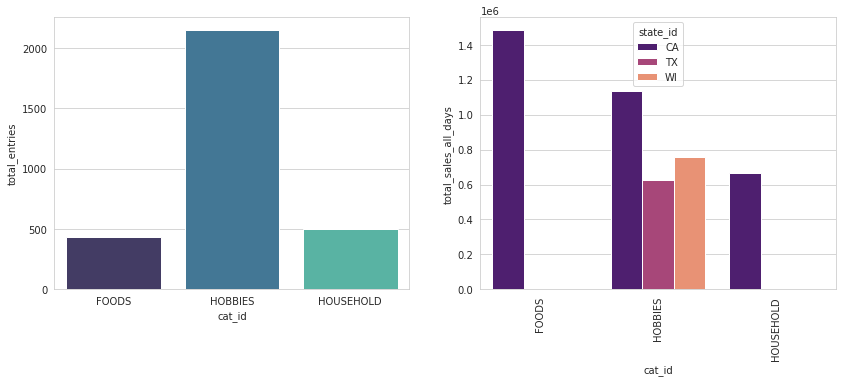

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị

# set style cho seaborn là whitegrid => không set mặc định là darkgrid
sns.set_style('whitegrid')

# set style cho 2 trục của biểu đồ là ticks => không set mặc định là darkgrid
sns.axes_style(style='ticks')

# plt.subplots : Nhiều biểu đồ trong 1 figure. Phương thức này lấy hai đối số nrows và ncols làm số lượng hàng và số cột tương ứng
# Vd : plt.subplots(1,2,..) : 1 hàng 2 cột
# figsize=(14,5) : Phương thức này tạo ra hai đối tượng: figure và axes mà chúng ta lưu trữ trong các biến fig và ax có thể được sử dụng để thay đổi các thuộc tính mức figure và axes tương ứng
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

# Hàm barplot() hoạt động trên một tập dữ liệu đầy đủ và mô tả một ước lượng (mặc định là sử dụng trung bình cộng - mean).
sns.barplot(x = 'cat_id', y='total_entries', data=df_by_cat, 
            palette='mako', ax=ax1)
sns.barplot(x = 'cat_id', y='total_sales_all_days', hue='state_id', data=df_by_cat_and_state, 
            palette='magma', ax=ax2)

plt.xticks(rotation=90)
plt.show()

In [67]:
# Thông tin số lượng mặt hàng bán ra theo Danh mục và Bang
df_count_by_cat_and_state = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category')

df_count_by_cat_and_state

,state_id,cat_id,num_sales_by_category
0,CA,FOODS,429
1,CA,HOBBIES,817
2,CA,HOUSEHOLD,501
3,TX,HOBBIES,661
4,WI,HOBBIES,667


In [69]:
# Biểu đồ số lượng mặt hàng bán ra theo Danh mục và Bang
fig = px.bar(df_count_by_cat_and_state, x="state_id", y="num_sales_by_category", 
             color="cat_id", title="Biểu đồ số lượng mặt hàng bán ra theo Danh mục và Bang")
fig.show()

In [78]:
# train_sales_df.columns[6:] : lấy sổ cột bắt đầu từ index = 6 tới hết
df_by_dept_store_state_cat = train_sales_df.groupby(['dept_id', 'store_id', 'state_id', 'cat_id'])[train_sales_df.columns[6:]].sum().reset_index().sort_values('total_sales_all_days', ascending=False)

df_by_dept_store_state_cat

,dept_id,store_id,state_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,...,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,total_sales_all_days,avg_sales_all_days,median_sales_all_days
3,HOBBIES_1,CA_1,CA,HOBBIES,528,489,409,383,263,453,...,517,461,333,380,471,621,641,821524,429.442760,180.0
2,FOODS_3,CA_1,CA,FOODS,380,407,208,308,301,359,...,389,373,368,414,478,575,581,747411,390.700993,272.0
7,HOBBIES_1,WI_1,WI,HOBBIES,598,433,317,131,0,460,...,305,370,313,363,389,483,525,608123,317.889702,131.0
0,FOODS_1,CA_1,CA,FOODS,297,284,214,175,182,191,...,302,237,287,297,331,419,329,567849,296.836905,143.0
12,HOUSEHOLD_1,CA_1,CA,HOUSEHOLD,165,165,146,136,95,135,...,324,287,302,263,346,370,448,513820,268.593832,140.0
5,HOBBIES_1,TX_1,TX,HOBBIES,241,246,96,229,91,287,...,183,259,240,192,240,254,345,386024,201.789859,36.0
4,HOBBIES_1,CA_2,CA,HOBBIES,195,108,134,125,110,146,...,148,110,141,104,174,218,154,229265,119.845792,31.0
6,HOBBIES_1,TX_2,TX,HOBBIES,110,123,72,119,77,81,...,81,131,106,103,113,165,153,218339,114.134344,35.0
1,FOODS_2,CA_1,CA,FOODS,158,155,92,102,103,118,...,86,62,70,57,76,115,121,167269,87.438055,53.0
13,HOUSEHOLD_2,CA_1,CA,HOUSEHOLD,85,80,39,51,64,78,...,89,81,101,88,91,148,172,152292,79.608991,9.0


In [84]:
# Go cung cấp nhiều kiểu vẽ biễu đồ phân tán
import plotly.graph_objects as go

x_dept = df_by_dept_store_state_cat['dept_id']
x_store = df_by_dept_store_state_cat['store_id']

# define hàm vẽ biểu đồ 
def items_sold_per_days(x_spec,title_text, title):
    
    '''
    Vẽ biểu đồ với dropdown menus dựa vào số lượng ngày chỉ định

    inputs: x_spec (Danh mục các cột nằm trên trục ngang), 
    title_text(Tên dropdown), 
    title (Tên biểu đồ)   
    '''
    
    # khai báo số cột cần tính toán
    cols = ['d_1', 'd_50', 'd_300', 'd_500', 'd_700', 'd_900', 'd_1100', 'd_1500', 'd_1700',
        'total_sales_all_days', 'median_sales_all_days']

    buttons1 = [dict(method = "restyle",
                 args = [{'x': [x_spec, 'undefined'],
                          'y': [df_by_dept_store_state_cat[cols[k]], 'undefined'],
                          'visible':[True, False]}], 
                 label = cols[k])   for k in range(0, len(cols))]

    fig = go.Figure()
    fig.add_trace(go.Bar(x=x_spec, y = df_by_dept_store_state_cat['d_1'], name='Dept.Sales on day2',
                     marker_color='Crimson'))

    # cập nhật lại layout của fig
    fig.update_layout(title_text= title_text,
                  title_x= 0.4, width=750, height=450, 
                  margin=dict(t=100, b=20, l=0, r=0),
                  autosize = False,
                  updatemenus=[dict(active=0,
                                    buttons=buttons1,
                                    x=0.08,
                                    y=1.13,
                                    xanchor='left',
                                    yanchor='top')
                              ]); 

    fig.add_annotation( x=0.00,  y=1.13, showarrow=False, xref='paper', yref='paper', xanchor='left',
                   text="Với <br>"+str(title));
    fig.show()

items_sold_per_days(df_by_dept_store_state_cat['store_id'], 'Số lượng bán ra trên mỗi cửa hàng', 'Cửa hàng')
items_sold_per_days(df_by_dept_store_state_cat['state_id'], "Số lượng bán ra trên mỗi bang", 'Bang')